In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Bonds') + ['AGG', 'BND', 'BNDX', 'BIV', 'SCHZ'], 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-23 to 2019-07-12 - 77


In [3]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['std'] > 0.1)]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

63


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
EMLC,30,1.159813,0.764268,1.465626,8.037447,0.546927
CWB,30,0.869960,1.082261,0.767169,5.386663,1.388529
VCLT,30,0.816893,1.204336,0.645344,5.039098,2.439522
VWOB,30,0.652446,0.672234,0.911534,4.370599,0.829215
EMB,30,0.651285,0.895421,0.683034,4.155060,1.290153
BLV,30,0.622664,1.138194,0.512199,3.815648,2.488783
LQD,30,0.578906,0.830559,0.649230,3.617690,1.584890
BWX,30,0.484586,0.986496,0.450994,3.335011,1.362600
USIG,30,0.453483,0.606037,0.682798,2.782189,1.170711


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


evicted LMBS 0.684 -0.395
evicted BSCK 0.544 -0.412
evicted HYD 0.618 -0.470
evicted BWX 0.762 0.024
evicted PZA 0.596 -0.365
evicted BNDX 0.771 -0.239
evicted VCLT 0.722 -0.211
evicted TLT 0.267 -0.359
retry backlogs ['VMBS', 'SCHP', 'IPE', 'VTEB', 'SPSB', 'TIP', 'MBB', 'SLQD', 'IGSB', 'ISTB', 'VCSH', 'TDTT', 'SCHO', 'HYLS', 'JNK', 'SHY', 'STIP', 'MUB', 'VTIP', 'IEF', 'AGG', 'SCHR', 'SJNK', 'SPTL', 'BND', 'BSJK', 'VGIT', 'IEI', 'SPTS', 'USIG', 'VGSH', 'IBDL', 'BKLN', 'LQD', 'HYG', 'BIV', 'BSV', 'HYLB', 'GOVT', 'SPIB', 'HYS', 'SCHZ', 'SHYG', 'ITM', 'TFI', 'SRLN', 'CMF', 'EMB', 'IGIB', 'VWOB', 'VCIT', 'BLV'] at 0.805/-0.51 - 2.043
evicted IBDL 0.723 -0.162
evicted USIG 0.760 -0.104
evicted IPE 0.691 -0.289
evicted CMF 0.643 -0.440
evicted SPTL 0.276 -0.371
retry backlogs ['STIP', 'VTIP', 'TDTT', 'VTEB', 'VGIT', 'SHYG', 'GOVT', 'VMBS', 'BND', 'IEF', 'SPSB', 'VGSH', 'BSV', 'SLQD', 'AGG', 'SCHR', 'SPTS', 'SCHO', 'BIV', 'BSJK', 'SCHP', 'MBB', 'VCSH', 'SHY', 'IEI', 'MUB', 'HYS', 'TIP', 'ISTB

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,0.766234,0.355534,0.179304,0.467093,0.757592,1.030533,1.387738,2.043550,5.411881,0.385328
EMLC,30.0,1.159813,0.764268,-0.173364,0.586118,1.014487,1.712944,2.768686,1.465626,8.037447,0.546927
CWB,30.0,0.869960,1.082261,-1.308335,0.210582,0.937446,1.482917,3.391522,0.767169,5.386663,1.388529
NUV,30.0,0.383851,0.679328,-0.785086,-0.212757,0.443061,0.962000,1.499999,0.506631,3.244030,0.982324


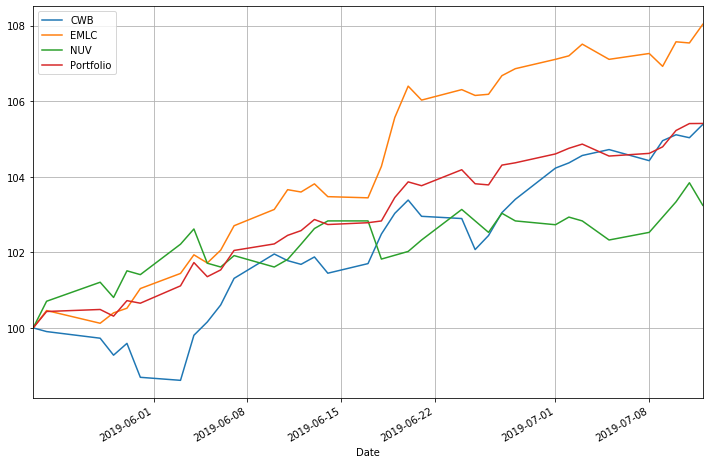

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(backlogs_pos_threshold=.8, _lambda=5)
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=5))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)